# Lead Score Case Study 

### Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not.

The company requires to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

### Analysis Approach
We'll perform **Logistic Regression** on the given data and generate the lead scores using the converted probabilities. 

#### Steps to be performed:
1. Reading and Understanding the data
2. Data Cleaning
3. Data Visualization
4. Data Preparation
5. Model Building
6. Model Evaluation

In [1]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='dark')
%matplotlib inline

# Pandas display settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_info_columns', 200)
pd.set_option('display.max_colwidth', -1)
pd.set_option('float_format','{:f}'.format)

# Loading the libraries for data preparation, model building and evaluation 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics

## 1. Reading and Understanding the data

In [3]:
# Read the dataset

leads = pd.read_csv(r'Leads.csv')
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620  660737       API                       
1  2a272436-5132-4136-86fa-dcc88c88f482  660728       API                       
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  660727       Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  660719       Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  660681       Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0  Olark Chat      No           No          0         0.000000       
1  Organic Search  No           No          0         5.000000       
2  Direct Traffic  No           No          1         2.000000       
3  Direct Traffic  No           No          0         1.000000       
4  Google          No           No          1         2.000000       

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0  0                           0.000000               Page Visited on Website   
1  674                         2.500000               Email Opened              
2  1532                        2.000000               Email Opened              
3  305                         1.000000               Unreachable               
4  1428                        1.000000               Converted to Lead         

  Country           Specialization How did you hear about X Education  \
0  NaN     Select                   Select                              
1  India   Select                   Select                              
2  India   Business Administration  Select                              
3  India   Media and Advertising    Word Of Mouth                       
4  India   Select                   Other                               

  What is your current occupation  \
0  Unemployed                       
1  Unemployed                       
2  Student                          
3  Unemployed                       
4  Unemployed                       

  What matters most to you in choosing a course Search Magazine  \
0  Better Career Prospects                       No     No        
1  Better Career Prospects                       No     No        
2  Better Career Prospects                       No     No        
3  Better Career Prospects                       No     No        
4  Better Career Prospects                       No     No        

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0  No                No                 No        No                     
1  No                No                 No        No                     
2  No                No                 No        No                     
3  No                No                 No        No                     
4  No                No                 No        No                     

  Through Recommendations Receive More Updates About Our Courses  \
0  No                      No                                      
1  No                      No                                      
2  No                      No                                      
3  No                      No                                      
4  No                      No                                      

                                  Tags      Lead Quality  \
0  Interested in other courses          Low in Relevance   
1  Ringing                              NaN                
2  Will revert after reading the email  Might be           
3  Ringing                              Not Sure           
4  Will revert after reading the email  Might be           

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0  No                                No                        Select           
1  No                                No                        Select           
2  No                                No                        Potential Lead   
3  No                        

In [4]:
# Inspect the shape of the dataset

leads.shape

(9240, 37)

In [5]:
# Inspect the different columsn in the dataset

leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
# Finding the statistics of the numerical columns
leads.describe()

Lead Number   Converted  TotalVisits  Total Time Spent on Website  \
count 9240.000000   9240.000000 9103.000000  9240.000000                    
mean  617188.435606 0.385390    3.445238     487.698268                     
std   23405.995698  0.486714    4.854853     548.021466                     
min   579533.000000 0.000000    0.000000     0.000000                       
25%   596484.500000 0.000000    1.000000     12.000000                      
50%   615479.000000 0.000000    3.000000     248.000000                     
75%   637387.250000 1.000000    5.000000     936.000000                     
max   660737.000000 1.000000    251.000000   2272.000000                    

       Page Views Per Visit  Asymmetrique Activity Score  \
count 9103.000000           5022.000000                    
mean  2.362820              14.306252                      
std   2.161418              1.386694                       
min   0.000000              7.000000                       
25%   1.000000              14.000000                      
50%   2.000000              14.000000                      
75%   3.000000              15.000000                      
max   55.000000             18.000000                      

       Asymmetrique Profile Score  
count 5022.000000                  
mean  16.344883                    
std   1.811395                     
min   11.000000                    
25%   15.000000                    
50%   16.000000                    
75%   18.000000                    
max   20.000000

In [7]:
# Check the info to see the types of the feature variables and the null values present

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

**Looks like there are quite a few categorical variables present in this dataset for which we will need to create dummy variables. Also, there are a lot of null values present as well, so we will need to treat them accordingly.**

## Step 2: Data Cleaning and Preparation

In [8]:
# Finding the number of null values in each column of the dataset

leads.isnull().sum()

Prospect ID                                      0   
Lead Number                                      0   
Lead Origin                                      0   
Lead Source                                      36  
Do Not Email                                     0   
Do Not Call                                      0   
Converted                                        0   
TotalVisits                                      137 
Total Time Spent on Website                      0   
Page Views Per Visit                             137 
Last Activity                                    103 
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                           0   
Magazine                                         0   
Newspaper Article           

**As there are a lot of columns which have high number of missing values. Clearly, these columns are not useful. Let's eliminate the columns having greater than 3000 missing values as they are of no use to us.**

In [9]:
# Drop all the columns in which greater than 3000 missing values are present

for col in leads.columns:
    if leads[col].isnull().sum() > 3000:
        leads.drop(col, 1, inplace=True)

In [10]:
# Let's check the number of null values again

leads.isnull().sum()

Prospect ID                                      0   
Lead Number                                      0   
Lead Origin                                      0   
Lead Source                                      36  
Do Not Email                                     0   
Do Not Call                                      0   
Converted                                        0   
TotalVisits                                      137 
Total Time Spent on Website                      0   
Page Views Per Visit                             137 
Last Activity                                    103 
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                           0   
Magazine                                         0   
Newspaper Article           

### 2.2. Dealing with the columns with level 'Select'

**Now we have few columns in which there is a level called 'Select' which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are same as null values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.**

In [11]:
leads.isin(['Select']).sum(axis=0)

Prospect ID                                      0   
Lead Number                                      0   
Lead Origin                                      0   
Lead Source                                      0   
Do Not Email                                     0   
Do Not Call                                      0   
Converted                                        0   
TotalVisits                                      0   
Total Time Spent on Website                      0   
Page Views Per Visit                             0   
Last Activity                                    0   
Country                                          0   
Specialization                                   1942
How did you hear about X Education               5043
What is your current occupation                  0   
What matters most to you in choosing a course    0   
Search                                           0   
Magazine                                         0   
Newspaper Article           

**The columns `Specialization`, `How did you hear about X Education`, `Lead Profile` and `City` have rows which have the value `Select`. Let'analyse these columns**

In [12]:
# Get the row count of the 'Select' columns

col_select = ['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']
for x in col_select:
    print(leads[x].astype('category').value_counts())
    print('___________________________________________________')

Select                               1942
Finance Management                   976 
Human Resource Management            848 
Marketing Management                 838 
Operations Management                503 
Business Administration              403 
IT Projects Management               366 
Supply Chain Management              349 
Banking, Investment And Insurance    338 
Travel and Tourism                   203 
Media and Advertising                203 
International Business               178 
Healthcare Management                159 
Hospitality Management               114 
E-COMMERCE                           112 
Retail Management                    100 
Rural and Agribusiness               73  
E-Business                           57  
Services Excellence                  40  
Name: Specialization, dtype: int64
___________________________________________________
Select                   5043
Online Search            808 
Word Of Mouth            348 
Student of SomeSchool    

**Clearly the columns , `How did you hear about X Education`, `Lead Profile` and `City` have a lot of rows which have the value `Select` which is of no use to the analysis so it's best that we drop them.**

In [13]:
leads.drop([ 'City', 'Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

In [14]:
# Let's analyse our dataframe and get the value counts of all the columns

for column in leads:
    print(leads[column].astype('category').value_counts())
    print('___________________________________________________')

fffb0e5e-9f92-4017-9f42-781a69da4154    1
56453aec-3f7b-4f30-870c-8f966d393100    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
539eb309-df36-4a89-ac58-6d3651393910    1
5398e7ff-74db-4074-89fb-4fd9a603f521    1
53953744-234a-4cb9-9af4-bcc47eb472f4    1
539366d9-f633-455a-99e4-dbc5907db28e    1
5390c5fe-b12c-4f6e-ae92-908672abb0a1    1
5379ee79-64b7-44f8-8c56-0e1ca2d5b887    1
537963c8-22d9-459d-8aae-ddac40580ffb    1
53744d5a-0483-42c0-80b0-8990a4d2356d    1
53715ab1-2106-4c4e-8493-81cc465eb9ce    1
536cdc6b-f4c1-449d-bfd8-9ef0ac912dbb    1
53690d88-52f0-4ce5-b6b8-a13570a6db35    1
5363bd79-576c-48ed-83e4-024c81ea00c5    1
53c4e210-3344-4737-813f-74ef9a747ab6    1
53dbb914-71e7-458a-9749-cfb4d655eac2    1
53dd16bd-8201-448d-8e20-97de1cf44a7f    1
541325bd-15bb-4b52-8ad9-3fdf3cb1dd55    1
5434ccf3-9de6-4c72-8dd6-66c2829d0ee2    1
542a0891-2e52-40ba-ab42-e468b9636322    1
54238b21-65ce-4304-98c6-0f8a6b9671

No     9239
Yes    1   
Name: Newspaper, dtype: int64
___________________________________________________
No     9236
Yes    4   
Name: Digital Advertisement, dtype: int64
___________________________________________________
No     9233
Yes    7   
Name: Through Recommendations, dtype: int64
___________________________________________________
No    9240
Name: Receive More Updates About Our Courses, dtype: int64
___________________________________________________
No    9240
Name: Update me on Supply Chain Content, dtype: int64
___________________________________________________
No    9240
Name: Get updates on DM Content, dtype: int64
___________________________________________________
No    9240
Name: I agree to pay the amount through cheque, dtype: int64
___________________________________________________
No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64
___________________________________________________
Modified                        3407
Email Opened

**Inferences**

We notice that when you got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include `Do Not Email`, `Do Not Call`, `Search`, `Magazine`, `Newspaper Article`, `X Education Forums`, `Newspaper`, `Digital Advertisement`, `Through Recommendations`, `Receive More Updates About Our Courses`, `Update me on Supply Chain Content`, `Get updates on DM Content`, `I agree to pay the amount through cheque`. Since practically all of the values for these variables are `No`, it's best that we drop these columns as they won't help with our analysis and will SKEW the analysis if taken into consideration.

In [15]:
leads.drop(['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

Also, the column `What matters most to you in choosing a course` has a category `Better Career Prospects` `6528` times while the other two categories appear only twice and once respectively. So we should drop this column as well.

In [16]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience    2   
Other                        1   
Name: What matters most to you in choosing a course, dtype: int64

In [17]:
# Drop 'What matters most to you in choosing a course' column as more than 99% of it's value belongs to same category.

leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

Also, the `Country` column has more than 99% of the leads have their Country as India, so it won't help us much in classifying the leads. Maybe, the target audience of this campaign were Indians only.

In [18]:
leads['Country'].value_counts()

India                   6492
United States           69  
United Arab Emirates    53  
Singapore               24  
Saudi Arabia            21  
United Kingdom          15  
Australia               13  
Qatar                   10  
Hong Kong               7   
Bahrain                 7   
France                  6   
Oman                    6   
unknown                 5   
Nigeria                 4   
South Africa            4   
Germany                 4   
Kuwait                  4   
Canada                  4   
Sweden                  3   
Uganda                  2   
Netherlands             2   
Belgium                 2   
Ghana                   2   
Bangladesh              2   
Italy                   2   
China                   2   
Philippines             2   
Asia/Pacific Region     2   
Denmark                 1   
Sri Lanka               1   
Indonesia               1   
Malaysia                1   
Tanzania                1   
Liberia                 1   
Switzerland   

In [19]:
# Drop 'Country' column as 99% of the leads have their Country as India (4743 times) 

leads.drop(['Country'], axis = 1, inplace=True)

In [20]:
# Check the number of null values again

leads.isnull().sum()

Prospect ID                               0   
Lead Number                               0   
Lead Origin                               0   
Lead Source                               36  
Converted                                 0   
TotalVisits                               137 
Total Time Spent on Website               0   
Page Views Per Visit                      137 
Last Activity                             103 
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview    0   
Last Notable Activity                     0   
dtype: int64

Now, there's the columns like `Specialization`and `What is your current occupation` which has a lot of null values. Now we will check for the values counts for these column and replace them with mode/median depending upon if the variable is categorical or continuous.

We see that mode of `Lead source` is `Google` and we also observe that we have `google` as well. hence we'll treat null values as Google and combine the string forms:

In [21]:
#Specialization
leads["Specialization"].value_counts()

Select                               1942
Finance Management                   976 
Human Resource Management            848 
Marketing Management                 838 
Operations Management                503 
Business Administration              403 
IT Projects Management               366 
Supply Chain Management              349 
Banking, Investment And Insurance    338 
Media and Advertising                203 
Travel and Tourism                   203 
International Business               178 
Healthcare Management                159 
Hospitality Management               114 
E-COMMERCE                           112 
Retail Management                    100 
Rural and Agribusiness               73  
E-Business                           57  
Services Excellence                  40  
Name: Specialization, dtype: int64

Since "Select" value in column can be considered as no data entry, we can replace the null values and "Select" to "Others" and continue with analysis.

In [22]:
leads['Specialization'] = leads['Specialization'].replace([np.nan,"Select"], 'Others')
#replace null and Select with Others

In [23]:
#Occupation
leads["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional    706 
Student                 210 
Other                   16  
Housewife               10  
Businessman             8   
Name: What is your current occupation, dtype: int64

Since mode of occupation is unemployed we'll replace the null values with Mode value:

In [24]:
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')
#replace null With mode value

In [25]:
# Check the number of null values again

leads.isnull().sum()

Prospect ID                               0  
Lead Number                               0  
Lead Origin                               0  
Lead Source                               36 
Converted                                 0  
TotalVisits                               137
Total Time Spent on Website               0  
Page Views Per Visit                      137
Last Activity                             103
Specialization                            0  
What is your current occupation           0  
A free copy of Mastering The Interview    0  
Last Notable Activity                     0  
dtype: int64

Now the remaining columns have very low percentage of missing values , hence we decide to drop those rows directly:

In [26]:
#dropping remaining null value rows:
leads.dropna(inplace= True)

In [27]:
# Check the number of null values again

leads.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

Now our data columns does not consist any null values and we can now proceed with next part of our EDA.

In [28]:
print(len(leads.index))
print(len(leads.index)/9240)     # 9240 was total number of rows in initial dataframe.

9074
0.982034632034632


We still have around 98% of the rows so we havent lost much data.

In [29]:
# Let's look at the dataset again

leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620  660737       API                       
1  2a272436-5132-4136-86fa-dcc88c88f482  660728       API                       
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  660727       Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  660719       Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  660681       Landing Page Submission   

      Lead Source  Converted  TotalVisits  Total Time Spent on Website  \
0  Olark Chat      0         0.000000      0                             
1  Organic Search  0         5.000000      674                           
2  Direct Traffic  1         2.000000      1532                          
3  Direct Traffic  0         1.000000      305                           
4  Google          1         2.000000      1428                          

   Page Views Per Visit            Last Activity           Specialization  \
0 0.000000               Page Visited on Website  Others                    
1 2.500000               Email Opened             Others                    
2 2.000000               Email Opened             Business Administration   
3 1.000000               Unreachable              Media and Advertising     
4 1.000000               Converted to Lead        Others                    

  What is your current occupation A free copy of Mastering The Interview  \
0  Unemployed                      No                                      
1  Unemployed                      No                                      
2  Student                         Yes                                     
3  Unemployed                      No                                      
4  Unemployed                      No                                      

  Last Notable Activity  
0  Modified              
1  Email Opened          
2  Email Opened          
3  Modified              
4  Modified

Now, clearly the variables `Prospect ID` and `Lead Number` won't be of any use in the analysis, so it's best that we drop these two variables.

In [30]:
leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [31]:
leads.head()

Lead Origin     Lead Source  Converted  TotalVisits  \
0  API                      Olark Chat      0         0.000000       
1  API                      Organic Search  0         5.000000       
2  Landing Page Submission  Direct Traffic  1         2.000000       
3  Landing Page Submission  Direct Traffic  0         1.000000       
4  Landing Page Submission  Google          1         2.000000       

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0  0                           0.000000               Page Visited on Website   
1  674                         2.500000               Email Opened              
2  1532                        2.000000               Email Opened              
3  305                         1.000000               Unreachable               
4  1428                        1.000000               Converted to Lead         

            Specialization What is your current occupation  \
0  Others                   Unemployed                       
1  Others                   Unemployed                       
2  Business Administration  Student                          
3  Media and Advertising    Unemployed                       
4  Others                   Unemployed                       

  A free copy of Mastering The Interview Last Notable Activity  
0  No                                     Modified              
1  No                                     Email Opened          
2  Yes                                    Email Opened          
3  No                                     Modified              
4  No                                     Modified

## 3. Data Visusalization:

### Checking distribution of features and outliers:
Lets check the resulting dataset features with the target variable to get brief idea regarding data distribution:

In [32]:
#funtion for univariate countplot
def uni(n):
    plt.figure(figsize=(12,8))
    sns.countplot(x = n, hue = "Converted", data = leads)
    plt.xticks(rotation=90)
    plt.show()
    

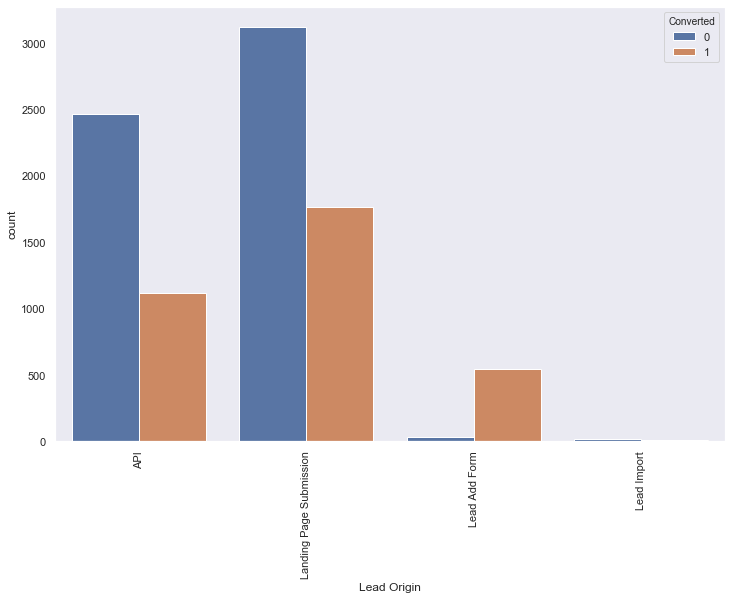

In [33]:
uni("Lead Origin")

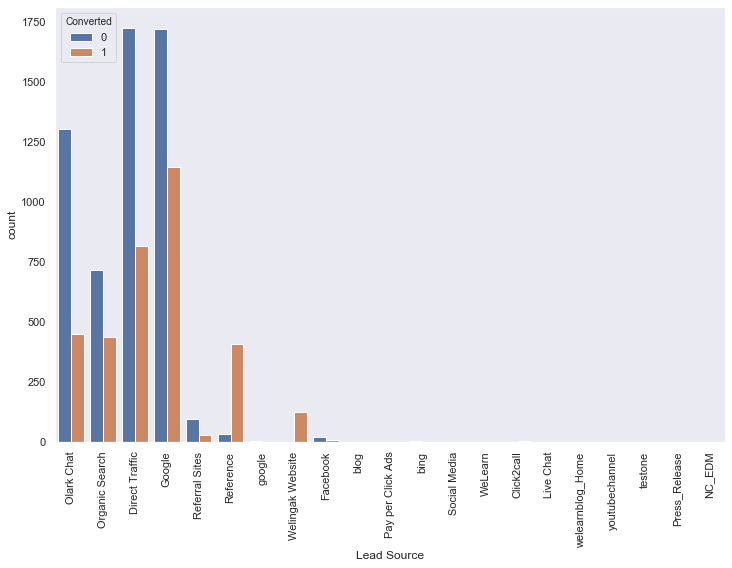

In [34]:
#Lead Source
uni("Lead Source")

We can see that we have "Google" 2 times in column and hence we need to replace that by one type of Tag.

More over we can consolidate the other remaining categories with low count into one category as "Others"

In [35]:
#replacing google by Google and combining differnet categories into "Others":
leads['Lead Source'] = leads['Lead Source'].replace(['google'], 'Google')
leads['Lead Source'] = leads['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')


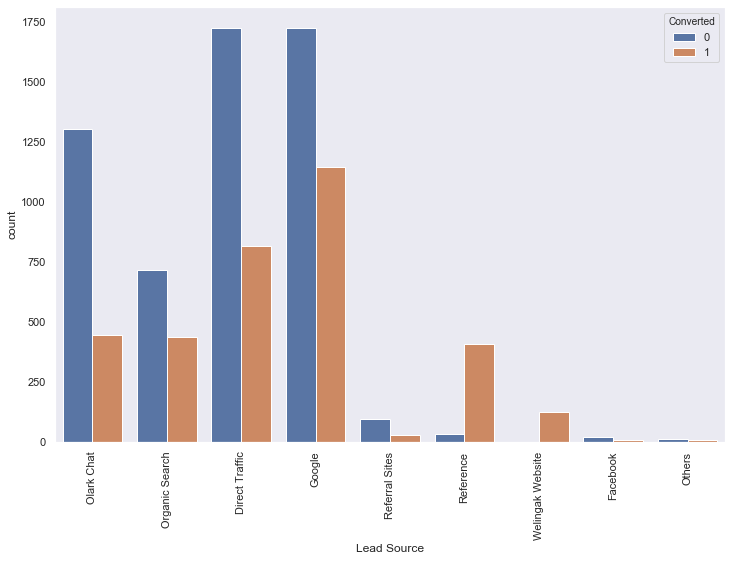

In [36]:
#Lead Source
uni("Lead Source")

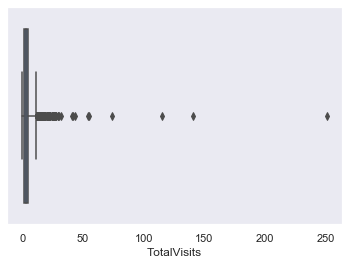

In [37]:
#total visits:
sns.boxplot(leads['TotalVisits'])
plt.show()

Since there are outliers in above column we can cap the values

In [38]:
leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count   9074.000000
mean    3.456028   
std     4.858802   
min     0.000000   
5%      0.000000   
25%     1.000000   
50%     3.000000   
75%     5.000000   
90%     7.000000   
95%     10.000000  
99%     17.000000  
max     251.000000 
Name: TotalVisits, dtype: float64

In [39]:
#capping values above 95 percentile:
q95 = leads["TotalVisits"].quantile(0.95)
leads['TotalVisits'][leads['TotalVisits'] >= q95] = q95

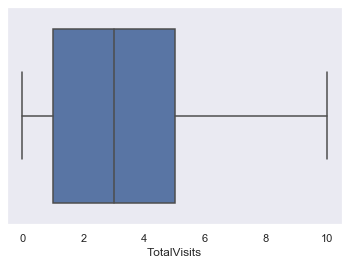

In [40]:
#total visits:
sns.boxplot(leads['TotalVisits'])

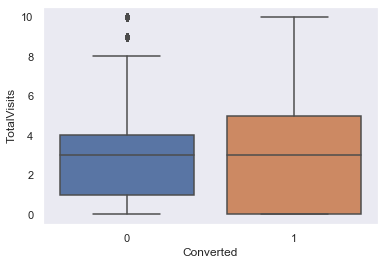

In [41]:
#total visits vs Converted:
sns.boxplot( y = 'TotalVisits', x = "Converted", data = leads)
plt.show()

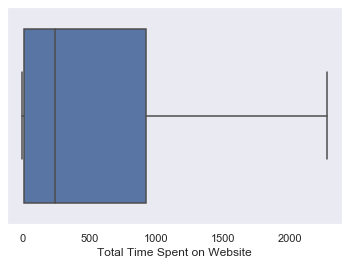

In [42]:
#Total Time Spent on Website
sns.boxplot(leads["Total Time Spent on Website"])
plt.show()

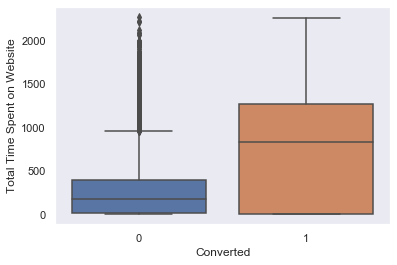

In [43]:
#Total Time Spent on Website vs conversion
sns.boxplot(y = "Total Time Spent on Website", x = "Converted",data = leads)
plt.show()

Persons spending more time on the weblise are more likely to be converted.

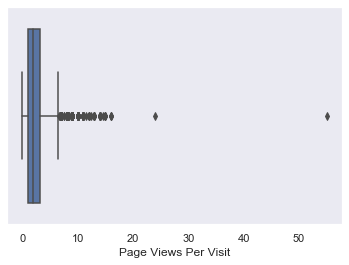

In [44]:
#Page Views Per Visit
sns.boxplot(leads["Page Views Per Visit"])
plt.show()

In [45]:
leads["Page Views Per Visit"].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count   9074.000000
mean    2.370151   
std     2.160871   
min     0.000000   
5%      0.000000   
25%     1.000000   
50%     2.000000   
75%     3.200000   
90%     5.000000   
95%     6.000000   
99%     9.000000   
max     55.000000  
Name: Page Views Per Visit, dtype: float64

In [46]:
#capping values above 99 percentile:
q95 = leads["Page Views Per Visit"].quantile(0.95)
leads["Page Views Per Visit"][leads["Page Views Per Visit"] >= q95] = q95

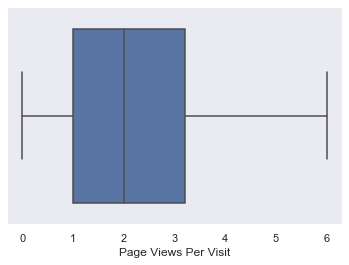

In [47]:
#Page Views Per Visit
sns.boxplot(leads["Page Views Per Visit"])
plt.show()

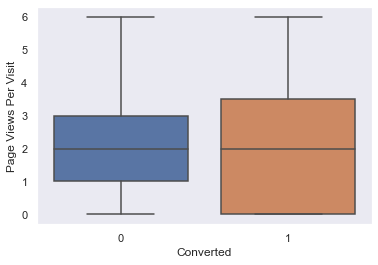

In [48]:
#"Page Views Per Visit" vs conversion
sns.boxplot(y = "Page Views Per Visit", x = "Converted",data = leads)
plt.show()

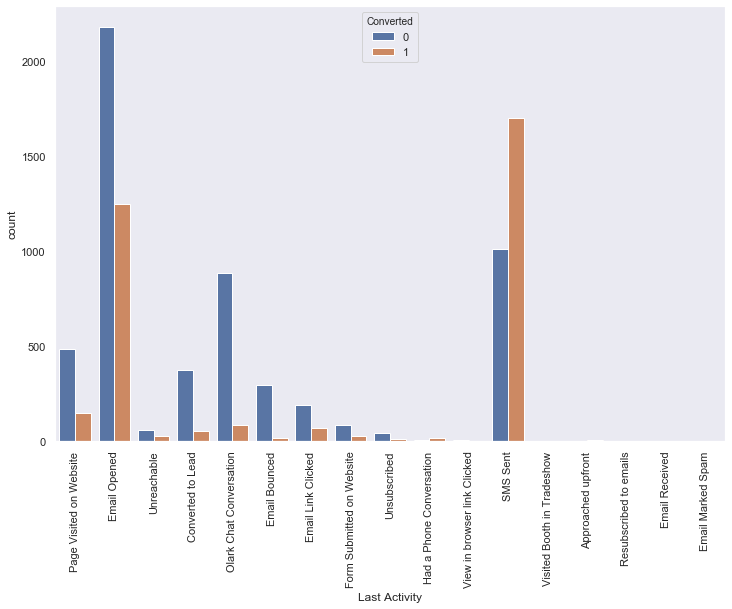

In [49]:
#Lead Source
uni("Last Activity")


- Most of the lead have their Email opened as their last activity.
- Conversion rate for leads with last activity as SMS Sent is almost 60%.b

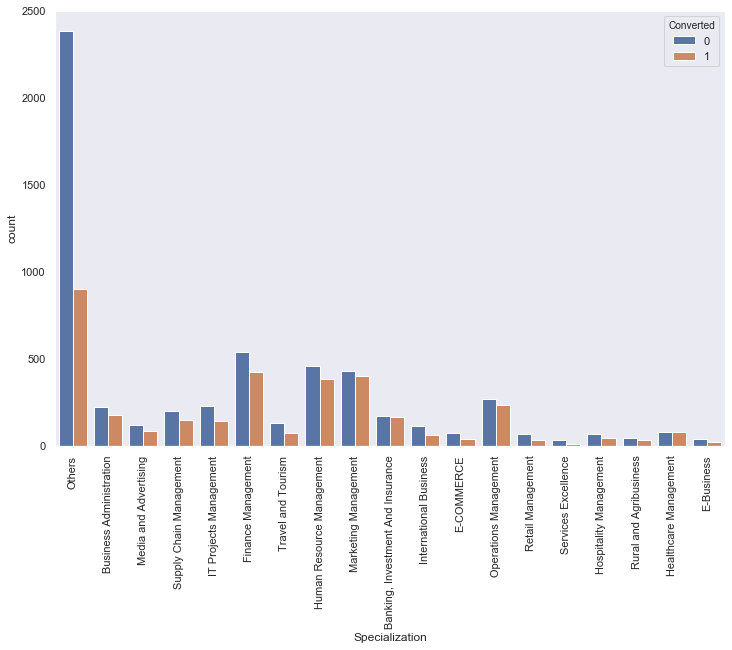

In [50]:
uni("Specialization")

Focus should be more on the Specialization with high conversion rate.

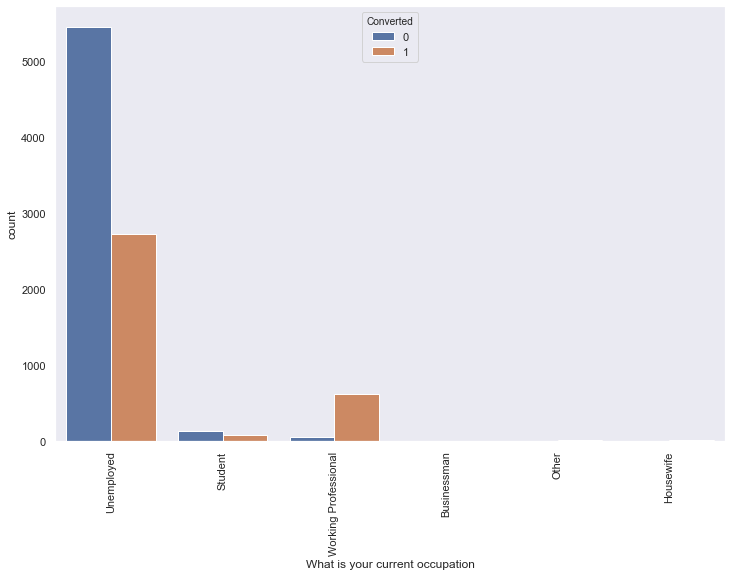

In [51]:
uni('What is your current occupation')

- Unemployed leads are the most in numbers but have moderate conversion rate.
- Working Professionals going for the course have high chances of joining it.

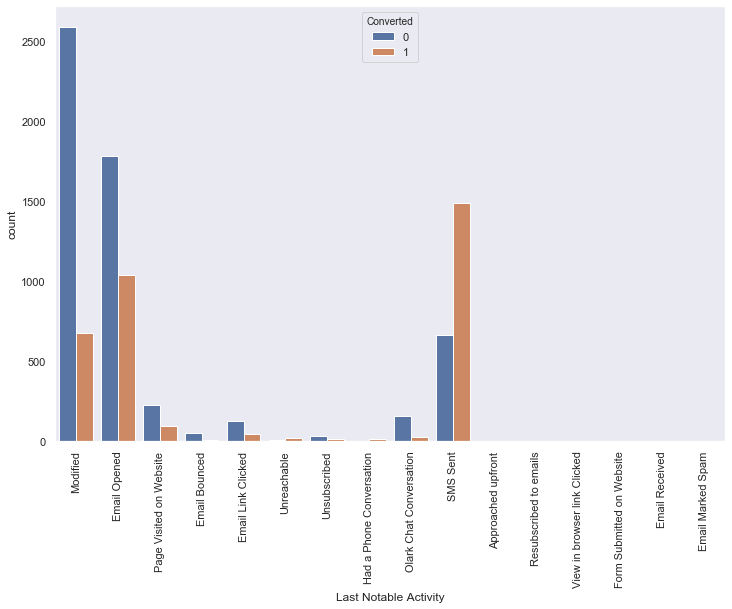

In [52]:
uni("Last Notable Activity")

- Emails have an almost equal number of converted and unconverted leads
- SMS send have the most leads getting converted.
- Focus should be made on the Modified category as it is currently nearly around 50% of leads converted.

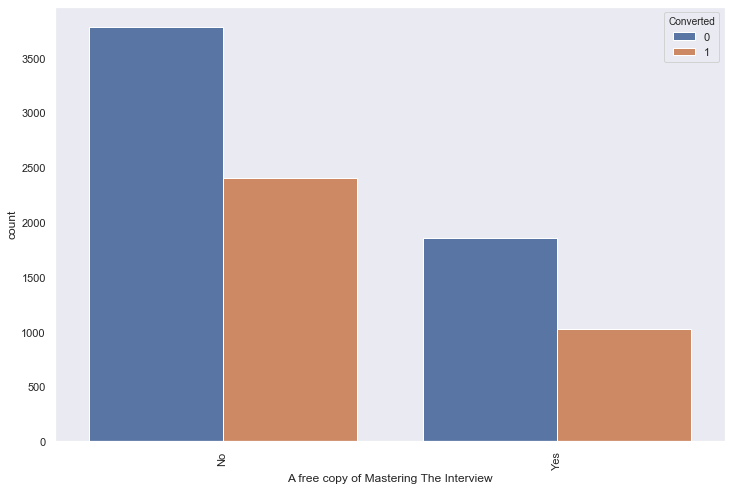

In [53]:
uni("A free copy of Mastering The Interview")

- Those who didnt subscribe for a free copy have greater lead conversions
- count of leads wanting a free copy is nearly half of those who opt for "NO".

## 4. Data Preparation

### 4.1 Dummy variable creation

We will create dummy variable for all the categorical columns present in the dataset.

In [54]:
# Check the columns which are of type 'object'

cat_col = leads.loc[:, leads.dtypes == 'object']
cat_col.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [55]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [56]:
leads['Specialization']

0       Others                           
1       Others                           
2       Business Administration          
3       Media and Advertising            
4       Others                           
5       Others                           
6       Supply Chain Management          
7       Others                           
8       IT Projects Management           
9       Finance Management               
10      Travel and Tourism               
11      Human Resource Management        
12      Marketing Management             
13      Business Administration          
14      Business Administration          
15      Others                           
16      Others                           
17      Others                           
18      Marketing Management             
19      Others                           
20      Media and Advertising            
21      Others                           
22      Banking, Investment And Insurance
23      Finance Management        

In [57]:
# Drop the variables for which the dummy variables have been created

leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Activity','Specialization', 'What is your current occupation',
                    'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)


In [58]:
# Let's take a look at the dataset again

leads.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0  0         0.000000      0                           0.000000                
1  0         5.000000      674                         2.500000                
2  1         2.000000      1532                        2.000000                
3  0         1.000000      305                         1.000000                
4  1         2.000000      1428                        1.000000                

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0  0                                    0                           
1  0                                    0                           
2  1                                    0                           
3  1                                    0                           
4  1                                    0                           

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0  0                        0                     0                    
1  0                        0                     0                    
2  0                        0                     0                    
3  0                        0                     0                    
4  0                        0                     1                    

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0  1                       0                           0                    
1  0                       1                           0                    
2  0                       0                           0                    
3  0                       0                           0                    
4  0                       0                           0                    

   Lead Source_Reference  Lead Source_Referral Sites  \
0  0                      0                            
1  0                      0                            
2  0                      0                            
3  0                      0                            
4  0                      0                            

   Lead Source_Welingak Website  Last Activity_Converted to Lead  \
0  0                             0                                 
1  0                             0                                 
2  0                             0                                 
3  0                             0                                 
4  0                             1                                 

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0  0                            0                                  
1  0                            0                                  
2  0                            0                                  
3  0                            0                                  
4  0                            0                                  

   Last Activity_Email Marked Spam  Last Activity_Email Opened  \
0  0                                0                            
1  0                                1                            
2  0                                1                            
3  0                                0                            
4  0                                0                            

   Last Activity_Email Received  Last Activity_Form Submitted on Website  \
0  0                             0                                         
1  0                             0                                         
2  0                             0                                         
3  0                             0                                         
4  0                             0                                         

   Last Activity_Had a Phone Conversation  \
0  0                                        
1  0                                        
2  0                                        
3  0                  

In [59]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 52 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9074 non-null   int64  
 1   TotalVisits                                           9074 non-null   float64
 2   Total Time Spent on Website                           9074 non-null   int64  
 3   Page Views Per Visit                                  9074 non-null   float64
 4   Lead Origin_Landing Page Submission                   9074 non-null   uint8  
 5   Lead Origin_Lead Add Form                             9074 non-null   uint8  
 6   Lead Origin_Lead Import                               9074 non-null   uint8  
 7   Lead Source_Facebook                                  9074 non-null   uint8  
 8   Lead Source_Google                                    9074

### 4.2 Correlations

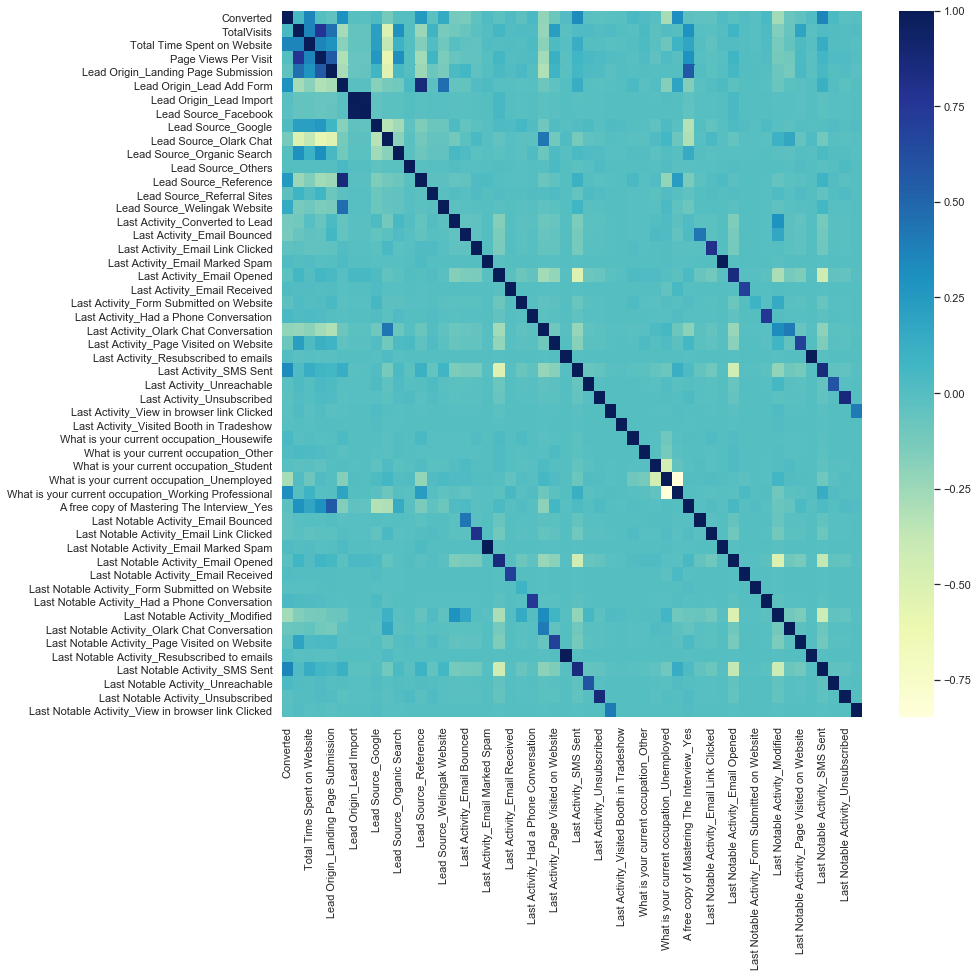

In [60]:
# Finding the correlation of all the variables
plt.figure(figsize=(13,13))
sns.heatmap(leads.corr(), cmap='YlGnBu');

- From the above heatmap we can see that several features are highly correlated having their parent features as Last activity and Last notable activity.
- Also, a high correlation is observed within Lead source_facebook and Lead origin_lead Import

### 4.3 Train-Test Split

In [61]:
# Splitting the target and predictors from the dataset

y = leads.pop('Converted')
X = leads
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0 0.000000      0                           0.000000                
1 5.000000      674                         2.500000                
2 2.000000      1532                        2.000000                
3 1.000000      305                         1.000000                
4 2.000000      1428                        1.000000                

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0  0                                    0                           
1  0                                    0                           
2  1                                    0                           
3  1                                    0                           
4  1                                    0                           

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0  0                        0                     0                    
1  0                        0                     0                    
2  0                        0                     0                    
3  0                        0                     0                    
4  0                        0                     1                    

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
0  1                       0                           0                    
1  0                       1                           0                    
2  0                       0                           0                    
3  0                       0                           0                    
4  0                       0                           0                    

   Lead Source_Reference  Lead Source_Referral Sites  \
0  0                      0                            
1  0                      0                            
2  0                      0                            
3  0                      0                            
4  0                      0                            

   Lead Source_Welingak Website  Last Activity_Converted to Lead  \
0  0                             0                                 
1  0                             0                                 
2  0                             0                                 
3  0                             0                                 
4  0                             1                                 

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0  0                            0                                  
1  0                            0                                  
2  0                            0                                  
3  0                            0                                  
4  0                            0                                  

   Last Activity_Email Marked Spam  Last Activity_Email Opened  \
0  0                                0                            
1  0                                1                            
2  0                                1                            
3  0                                0                            
4  0                                0                            

   Last Activity_Email Received  Last Activity_Form Submitted on Website  \
0  0                             0                                         
1  0                             0                                         
2  0                             0                                         
3  0                             0                                         
4  0                             0                                         

   Last Activity_Had a Phone Conversation  \
0  0                                        
1  0                                        
2  0                                        
3  0                                        
4  0                                       

In [62]:
# Splitting data in to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [63]:
# Finding the general data of the train dataset
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6351 entries, 3009 to 5754
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6351 non-null   float64
 1   Total Time Spent on Website                           6351 non-null   int64  
 2   Page Views Per Visit                                  6351 non-null   float64
 3   Lead Origin_Landing Page Submission                   6351 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6351 non-null   uint8  
 5   Lead Origin_Lead Import                               6351 non-null   uint8  
 6   Lead Source_Facebook                                  6351 non-null   uint8  
 7   Lead Source_Google                                    6351 non-null   uint8  
 8   Lead Source_Olark Chat                                6

### 4.4 Scaling

In [64]:
# Initialising the StandardScaler
scaler = StandardScaler()

In [65]:
# Scaling the continuous numerical columns using fit_transform
ncols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
X_train[ncols] = scaler.fit_transform(X_train[ncols])

In [66]:
# Finding the distribution of variables after rescaling
X_train.describe()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
count 6351.000000  6351.000000                  6351.000000             
mean  0.000000     0.000000                     0.000000                
std   1.000079     1.000079                     1.000079                
min   -1.150329    -0.888650                    -1.265540               
25%   -0.791554    -0.870303                    -0.710279               
50%   -0.074003    -0.435467                    -0.155018               
75%   0.643547     0.800237                     0.583480                
max   2.437423     3.195502                     2.066027                

       Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
count 6351.000000                          6351.000000                  
mean  0.535979                             0.068651                     
std   0.498743                             0.252879                     
min   0.000000                             0.000000                     
25%   0.000000                             0.000000                     
50%   1.000000                             0.000000                     
75%   1.000000                             0.000000                     
max   1.000000                             1.000000                     

       Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
count 6351.000000              6351.000000           6351.000000           
mean  0.003779                 0.003936              0.320737              
std   0.061362                 0.062622              0.466797              
min   0.000000                 0.000000              0.000000              
25%   0.000000                 0.000000              0.000000              
50%   0.000000                 0.000000              0.000000              
75%   0.000000                 0.000000              1.000000              
max   1.000000                 1.000000              1.000000              

       Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
count 6351.000000             6351.000000                 6351.000000           
mean  0.186427                0.127224                    0.002677              
std   0.389482                0.333250                    0.051672              
min   0.000000                0.000000                    0.000000              
25%   0.000000                0.000000                    0.000000              
50%   0.000000                0.000000                    0.000000              
75%   0.000000                0.000000                    0.000000              
max   1.000000                1.000000                    1.000000              

       Lead Source_Reference  Lead Source_Referral Sites  \
count 6351.000000            6351.000000                   
mean  0.051645               0.013384                      
std   0.221328               0.114920                      
min   0.000000               0.000000                      
25%   0.000000               0.000000                      
50%   0.000000               0.000000                      
75%   0.000000               0.000000                      
max   1.000000               1.000000                      

       Lead Source_Welingak Website  Last Activity_Converted to Lead  \
count 6351.000000                   6351.000000                        
mean  0.015903                      0.044717                           
std   0.125110                      0.206699                           
min   0.000000                      0.000000                           
25%   0.000000                      0.000000                           
50%   0.000000                      0.000000                           
75%   0.000000                      0.000000                           
max   1.000000                      1.000000                           

       Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
count 6351.000

## 5. Model Building
### RFE

In [67]:
# Initialising the LogisticRegression from sklearn
logreg = LogisticRegression()

# Initialising and fitting the RFE for 15 variables
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [68]:
# Finding the result of RFE
rfe.support_

array([False,  True, False, False,  True,  True, False, False,  True,
       False, False,  True, False,  True,  True,  True, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True,  True, False, False])

In [69]:
# Comparing the RFE results with the column names
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 18),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Lead Origin_Landing Page Submission', False, 23),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 14),
 ('Lead Source_Google', False, 15),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 37),
 ('Lead Source_Others', False, 20),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 25),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 22),
 ('Last Activity_Email Marked Spam', False, 26),
 ('Last Activity_Email Opened', False, 30),
 ('Last Activity_Email Received', False, 32),
 ('Last Activity_Form Submitted on Website', False, 16),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1

In [70]:
# Finding the columns which are selected by RFE
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [71]:
# Finding the columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Referral Sites',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activit

In [72]:
# Defining function to find Variance Inflation Factors of the predictors
def vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

### Model 1

In [73]:
# Subsetting the train data with the columns selected by RFE
X_train_1 = X_train[rfe_cols]

X_train_sm = sm.add_constant(X_train_1)
logr1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logr1.fit()
print(res.summary())
print('='*100)
print()
print(vif(X_train_1))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2673.4
Date:                Sun, 25 Oct 2020   Deviance:                       5346.8
Time:                        22:30:44   Pearson chi2:                 6.47e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In the above model, `Last Notable Activity_Had a Phone Conversation`and `What is your current occupation_Housewife` has the highest p-value(0.99) but `Last Notable Activity_Had a Phone Conversation` has greater VIF value than `What is your current occupation_Housewife`. So we will drop it.

### Model 2 

In [74]:
X_train_2 = X_train_1.drop(['Last Notable Activity_Had a Phone Conversation'], axis=1)

In [75]:
X_train_sm = sm.add_constant(X_train_2)
logr2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logr2.fit()
print(res.summary())
print('='*100)
print()
print(vif(X_train_2))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2674.6
Date:                Sun, 25 Oct 2020   Deviance:                       5349.2
Time:                        22:30:44   Pearson chi2:                 6.47e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Let's first drop the variable `Lead Source_Reference` since it has a high p-value as well as a high VIF.

### Model 3

In [76]:
X_train_3 = X_train_2.drop(['Lead Source_Reference'], axis=1)

In [77]:
X_train_sm = sm.add_constant(X_train_3)
logr2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logr2.fit()
print(res.summary())
print('='*100)
print()
print(vif(X_train_3))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2676.1
Date:                Sun, 25 Oct 2020   Deviance:                       5352.1
Time:                        22:30:45   Pearson chi2:                 6.45e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In the above model, `What is your current occupation_Housewife` has the highest p-value. So we will drop it.

### Model 4

In [78]:
X_train_4 = X_train_3.drop(['What is your current occupation_Housewife'], axis=1)

In [79]:
X_train_sm = sm.add_constant(X_train_4)
logr2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logr2.fit()
print(res.summary())
print('='*100)
print()
print(vif(X_train_4))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2681.0
Date:                Sun, 25 Oct 2020   Deviance:                       5362.0
Time:                        22:30:45   Pearson chi2:                 6.47e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In the above model, `What is your current occupation_Working Professional` has the highest p-value. So we will drop it.

### Model 5

In [80]:
X_train_5 = X_train_4.drop(['What is your current occupation_Working Professional'], axis=1)

In [81]:
X_train_sm = sm.add_constant(X_train_5)
logr2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logr2.fit()
print(res.summary())
print('='*100)
print()
print(vif(X_train_5))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2845.0
Date:                Sun, 25 Oct 2020   Deviance:                       5689.9
Time:                        22:30:45   Pearson chi2:                 6.51e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In the above model, `Lead Source_Welingak Website` has the highest p-value. So we will drop it.

### Model 6

In [82]:
X_train_6 = X_train_5.drop(['Lead Source_Welingak Website'], axis=1)

In [83]:
X_train_sm = sm.add_constant(X_train_6)
logr2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logr2.fit()
print(res.summary())
print('='*100)
print()
print(vif(X_train_6))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2848.3
Date:                Sun, 25 Oct 2020   Deviance:                       5696.7
Time:                        22:30:45   Pearson chi2:                 6.58e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

This will be our final model as p-values of all the columns are less than 0.05 and VIFs seem good enough for all the variables.

## 6. Model Evaluation

In [84]:
# Predicting the Converted probabilities using our final model
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19384003, 0.01596116, 0.26055164, 0.89231403, 0.74443756,
       0.78286278, 0.09525329, 0.91781353, 0.86956637, 0.70813363])

In [85]:
# Creating a dataframe consisting of actual converted and converted probabilites

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
0  0         0.193840        
1  0         0.015961        
2  0         0.260552        
3  1         0.892314        
4  1         0.744438

#### Creating new column 'Predicted' with 1 if Conversion_Prob > 0.5 else 0

In [86]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
0  0         0.193840          0        
1  0         0.015961          0        
2  0         0.260552          0        
3  1         0.892314          1        
4  1         0.744438          1

Now that we have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [87]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3412  493]
 [ 803 1643]]


In [88]:
# Predicted     not_churn    churn
# Actual
# not_churn        1931      381
# churn            566       1583

In [89]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7959376476145489


In [90]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [91]:
# Defining a function to print important metrics of our model
def model_metrics(confusion):

    print('Accuracy: %.6f' %((TP+TN)/(TP+FP+TN+FN)))
    print('Sensitivity: %.6f' %(TP/(TP+FN)))
    print('Specificity: %.6f' %(TN/(TN+FP)))
    print('False Positive Rate: %.6f' %(FP/(TN+FP)))
    print('Positive Predictive Value: %.6f' %(TP/(TP+FP)))
    print('Negative Predictive Value: %.6f' %(TN/(TN+FN)))
    
model_metrics(confusion)

Accuracy: 0.795938
Sensitivity: 0.671709
Specificity: 0.873752
False Positive Rate: 0.126248
Positive Predictive Value: 0.769195
Negative Predictive Value: 0.809490


### Plotting the ROC curve

In [92]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

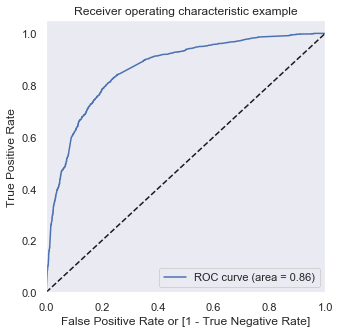

In [93]:
# Plotting the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate=False)

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.86 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

### Finding the optimal threshold

In [94]:
# Predicting the conversion for various threshold rates

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0  0         0.193840          0          1    1    0    0    0    0    0     
1  0         0.015961          0          1    0    0    0    0    0    0     
2  0         0.260552          0          1    1    1    0    0    0    0     
3  1         0.892314          1          1    1    1    1    1    1    1     
4  1         0.744438          1          1    1    1    1    1    1    1     

   0.7  0.8  0.9  
0  0    0    0    
1  0    0    0    
2  0    0    0    
3  1    1    0    
4  1    0    0

In [95]:
# Creating a dataframe with accuracy, sensitivity and specificity and their corresponding threshold values
cutoff_df = pd.DataFrame(columns = ['prob','accu','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cmi = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total = sum(sum(cmi))
    accu = (cmi[0,0]+cmi[1,1])/total
    speci = cmi[0,0]/(cmi[0,0]+cmi[0,1])
    sensi = cmi[1,1]/(cmi[1,0]+cmi[1,1])
    cutoff_df.loc[i] = [i, accu, sensi, speci]

cutoff_df

prob     accu    sensi    speci
0.000000 0.000000 0.385136 1.000000 0.000000
0.100000 0.100000 0.548575 0.977923 0.279641
0.200000 0.200000 0.726027 0.912510 0.609219
0.300000 0.300000 0.783971 0.833606 0.752881
0.400000 0.400000 0.793576 0.752657 0.819206
0.500000 0.500000 0.795938 0.671709 0.873752
0.600000 0.600000 0.789639 0.600981 0.907810
0.700000 0.700000 0.760195 0.462388 0.946735
0.800000 0.800000 0.733270 0.359362 0.967478
0.900000 0.900000 0.672335 0.166803 0.988988

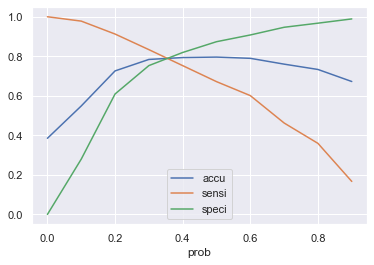

In [96]:
# Plotting tradeoff to find the optimal cutoff point
cutoff_df.plot.line(x='prob', y=['accu','sensi','speci']);
plt.grid()

We'll take our optimal cutoff point as **0.3**, as that's the value where all the above parameters coincide.

In [97]:
# Predicting the 'Converted' using 0.3 as the threshold value

y_train_pred_final['final_Predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0  0         0.193840          0          1    1    0    0    0    0    0     
1  0         0.015961          0          1    0    0    0    0    0    0     
2  0         0.260552          0          1    1    1    0    0    0    0     
3  1         0.892314          1          1    1    1    1    1    1    1     
4  1         0.744438          1          1    1    1    1    1    1    1     

   0.7  0.8  0.9  final_Predicted  
0  0    0    0    0                
1  0    0    0    0                
2  0    0    0    0                
3  1    1    0    1                
4  1    0    0    1

#### Lead Score
Here, we calculate the lead score by multiplying the `Conversion_Prob` by 100.

In [98]:
# Calculating the 'Lead_Score'
y_train_pred_final['Lead_Score'] = y_train_pred_final['Conversion_Prob'].map(lambda x: round(x*100))

y_train_pred_final[['Converted','Conversion_Prob','final_Predicted','Lead_Score']].head()

Converted  Conversion_Prob  final_Predicted  Lead_Score
0  0         0.193840          0                19        
1  0         0.015961          0                2         
2  0         0.260552          0                26        
3  1         0.892314          1                89        
4  1         0.744438          1                74

In [99]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7839710281845379

In [100]:
# Finding the confusion matrix for the new prediction

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2940,  965],
       [ 407, 2039]], dtype=int64)

In [101]:
# Finding the model metrics of new prediction

model_metrics(confusion2)

Accuracy: 0.795938
Sensitivity: 0.671709
Specificity: 0.873752
False Positive Rate: 0.126248
Positive Predictive Value: 0.769195
Negative Predictive Value: 0.809490


In [102]:
# Finding the precision and recall of the prediction

print('Precision: %.6f' %(metrics.precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)))
print('Recall: %.6f' %(metrics.recall_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)))

Precision: 0.678762
Recall: 0.833606


This cutoff point seems good to go!

## 5. Model Evaluation
### Making predictions on the test dataset

In [103]:
# Scaling the continuous numerical columns in the test set using 'transform'
ncols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
X_test[ncols] = scaler.transform(X_test[ncols])
X_test.describe()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
count 2723.000000  2723.000000                  2723.000000             
mean  -0.017216    -0.008906                    -0.024491               
std   0.991929     1.001335                     0.981226                
min   -1.150329    -0.888650                    -1.265540               
25%   -0.791554    -0.866633                    -0.710279               
50%   -0.074003    -0.446476                    -0.155018               
75%   0.643547     0.813997                     0.400244                
max   2.437423     3.279901                     2.066027                

       Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
count 2723.000000                          2723.000000                  
mean  0.543885                             0.053250                     
std   0.498162                             0.224573                     
min   0.000000                             0.000000                     
25%   0.000000                             0.000000                     
50%   1.000000                             0.000000                     
75%   1.000000                             0.000000                     
max   1.000000                             1.000000                     

       Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
count 2723.000000              2723.000000           2723.000000           
mean  0.002203                 0.002203              0.307014              
std   0.046898                 0.046898              0.461340              
min   0.000000                 0.000000              0.000000              
25%   0.000000                 0.000000              0.000000              
50%   0.000000                 0.000000              0.000000              
75%   0.000000                 0.000000              1.000000              
max   1.000000                 1.000000              1.000000              

       Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
count 2723.000000             2723.000000                 2723.000000           
mean  0.208961                0.127066                    0.002203              
std   0.406641                0.333108                    0.046898              
min   0.000000                0.000000                    0.000000              
25%   0.000000                0.000000                    0.000000              
50%   0.000000                0.000000                    0.000000              
75%   0.000000                0.000000                    0.000000              
max   1.000000                1.000000                    1.000000              

       Lead Source_Reference  Lead Source_Referral Sites  \
count 2723.000000            2723.000000                   
mean  0.042233               0.014690                      
std   0.201157               0.120330                      
min   0.000000               0.000000                      
25%   0.000000               0.000000                      
50%   0.000000               0.000000                      
75%   0.000000               0.000000                      
max   1.000000               1.000000                      

       Lead Source_Welingak Website  Last Activity_Converted to Lead  \
count 2723.000000                   2723.000000                        
mean  0.010283                      0.052883                           
std   0.100900                      0.223841                           
min   0.000000                      0.000000                           
25%   0.000000                      0.000000                           
50%   0.000000                      0.000000                           
75%   0.000000                      0.000000                           
max   1.000000                      1.000000                           

       Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
count 2723.000

In [104]:
# Subsetting the X_test with the columns in our final model
X_test = X_test[X_train_6.columns]
X_test.head()

Total Time Spent on Website  Lead Origin_Lead Add Form  \
3271 -0.600595                     0                           
1490 1.887326                      0                           
7936 -0.752879                     0                           
4216 -0.888650                     1                           
3830 -0.587751                     0                           

      Lead Origin_Lead Import  Lead Source_Olark Chat  \
3271  0                        0                        
1490  0                        0                        
7936  0                        0                        
4216  0                        0                        
3830  0                        0                        

      Last Activity_Converted to Lead  Last Activity_Email Bounced  \
3271  0                                0                             
1490  0                                0                             
7936  0                                0                             
4216  0                                0                             
3830  0                                0                             

      Last Activity_Had a Phone Conversation  \
3271  0                                        
1490  0                                        
7936  0                                        
4216  0                                        
3830  0                                        

      Last Activity_Olark Chat Conversation  Last Notable Activity_SMS Sent  \
3271  0                                      0                                
1490  0                                      0                                
7936  0                                      0                                
4216  0                                      0                                
3830  0                                      0                                

      Last Notable Activity_Unreachable  
3271  0                                  
1490  0                                  
7936  0                                  
4216  0                                  
3830  0

In [105]:
# Adding the constant to the test data
X_test_sm = sm.add_constant(X_test)

In [106]:
# Check X_test_sm

X_test_sm

const  Total Time Spent on Website  Lead Origin_Lead Add Form  \
3271 1.000000 -0.600595                     0                           
1490 1.000000 1.887326                      0                           
7936 1.000000 -0.752879                     0                           
4216 1.000000 -0.888650                     1                           
3830 1.000000 -0.587751                     0                           
1800 1.000000 -0.749209                     0                           
6507 1.000000 -0.651968                     0                           
4821 1.000000 0.362649                      0                           
4223 1.000000 -0.888650                     1                           
4714 1.000000 -0.888650                     0                           
3977 1.000000 -0.446476                     0                           
4209 1.000000 -0.888650                     0                           
2320 1.000000 -0.475832                     0                           
3744 1.000000 -0.888650                     0                           
2570 1.000000 -0.888650                     0                           
985  1.000000 1.566245                      0                           
1946 1.000000 0.151653                      0                           
7813 1.000000 -0.411615                     0                           
7031 1.000000 -0.888650                     0                           
2044 1.000000 -0.207958                     0                           
7906 1.000000 -0.450145                     0                           
2461 1.000000 -0.888650                     1                           
8154 1.000000 -0.147411                     0                           
5822 1.000000 -0.888650                     1                           
4513 1.000000 -0.888650                     0                           
2684 1.000000 -0.888650                     1                           
5999 1.000000 -0.297861                     0                           
4809 1.000000 0.902065                      0                           
4959 1.000000 -0.160255                     0                           
8449 1.000000 1.037837                      0                           
2010 1.000000 0.700243                      1                           
1405 1.000000 -0.112551                     0                           
2591 1.000000 -0.435467                     0                           
4062 1.000000 -0.031822                     1                           
5342 1.000000 -0.752879                     0                           
7696 1.000000 2.312988                      0                           
9049 1.000000 1.368092                      0                           
92   1.000000 -0.703341                     0                           
3756 1.000000 -0.380425                     0                           
9005 1.000000 -0.699671                     0                           
8465 1.000000 0.828675                      0                           
7298 1.000000 0.146148                      0                           
6600 1.000000 -0.527205                     0                           
6676 1.000000 1.399282                      0                           
6367 1.000000 -0.514361                     0                           
3848 1.000000 -0.802417                     0                           
1518 1.000000 0.373657                      0                           
7388 1.000000 -0.536378                     0                           
3765 1.000000 -0.648298                     0                           
4423 1.000000 -0.653802                     0                           
1106 1.000000 0.190182                      0                           
512  1.000000 1.846961                      0                           
4543 1.000000 -0.101543                     0                           
678  1.000000 -0.501518                     0                     

In [107]:
# Predicting the test data using our final model

y_test_pred = res.predict(sm.add_constant(X_test))

In [108]:
y_test_pred[:10]

3271   0.126795
1490   0.715034
7936   0.108707
4216   0.893838
3830   0.128433
1800   0.109115
6507   0.374185
4821   0.304420
4223   0.973524
4714   0.260552
dtype: float64

In [109]:
# Creating a dataframe with conversion probabilities

y_pred = pd.DataFrame(y_test_pred)
y_pred.reset_index(drop=True, inplace=True)
y_pred.head()

0
0 0.126795
1 0.715034
2 0.108707
3 0.893838
4 0.128433

In [110]:
# Creating dataframe 
y_test_df = pd.DataFrame(y_test)

# Remove index from dataframe

y_test_df.reset_index(drop=True, inplace=True)


In [111]:
# Combining the above dataframes with test predictions

y_pred_final = pd.concat([y_test_df, y_pred],axis=1)

In [112]:
# Rename the column 

y_pred_final.rename(columns={0:'Conversion_Prob'}, inplace=True)
y_pred_final.head()

Converted  Conversion_Prob
0  0         0.126795        
1  1         0.715034        
2  0         0.108707        
3  1         0.893838        
4  0         0.128433

In [113]:
# Make predictions on the test set using 0.3 as the cutoff

y_pred_final['final_Predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [114]:
# Check y_pred_final

y_pred_final.head()

Converted  Conversion_Prob  final_Predicted
0  0         0.126795          0              
1  1         0.715034          1              
2  0         0.108707          0              
3  1         0.893838          1              
4  0         0.128433          0

In [115]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_Predicted)


0.7781858244583181

In [116]:
# Calculating the lead score for the test predictions

y_pred_final['Lead_Score'] = y_pred_final['Conversion_Prob'].map(lambda x: round(x*100))

In [117]:
# mapping the dataset with corresponding Prospect ID:
y_pred_final["Prospect ID"] = y_test.index
y_pred_final.head()

Converted  Conversion_Prob  final_Predicted  Lead_Score  Prospect ID
0  0         0.126795          0                13          3271       
1  1         0.715034          1                72          1490       
2  0         0.108707          0                11          7936       
3  1         0.893838          1                89          4216       
4  0         0.128433          0                13          3830

In [118]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_Predicted )
confusion2

array([[1317,  417],
       [ 187,  802]], dtype=int64)

In [119]:
# Finding the model metrics for test predictions
model_metrics(confusion2)

Accuracy: 0.795938
Sensitivity: 0.671709
Specificity: 0.873752
False Positive Rate: 0.126248
Positive Predictive Value: 0.769195
Negative Predictive Value: 0.809490


In [120]:
# Finding the precision and recall of the test predictions
print('Precision: %.6f'%(metrics.precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)))
print('Recall: %.6f'%(metrics.recall_score(y_pred_final.Converted , y_pred_final.final_Predicted)))

Precision: 0.657916
Recall: 0.810920


- The model metrics are almost similar for both train and test datasets that shows the model is performing well.
- Our model has a Specificity of around 0.87 which shows it is able to correctly predict 87% of the converted leads.
- The precision of our model is around 0.65 which shows that the 65% of the leads predicted by the model are truly converted leads.

**Hence, this model will be helpful for the X education to increase their conversion rates.**

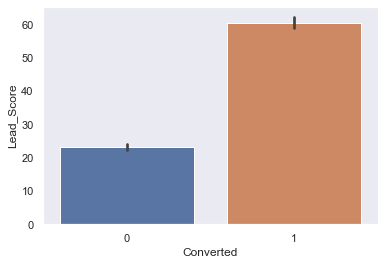

In [121]:
# Comparing the average values of conversion of the lead scores for converted and not converted

sns.barplot(data=y_pred_final, y='Lead_Score', x='Converted');

**From the above plot, we can see that the average `Lead_Score` of the converted is around 60 and that of not converted is around 20. So, the sales team can focus on leads with `Lead_score` of 60 or more which can be considered as "Hot leads".**

# ----------------------------------------------------------------------------------------------------------------